```{include} ../math-definitions.md
```

# Introducción



## ¿Qué es una serie de tiempo?
Una serie de tiempo $\{y_t\}_{t=1}^T$ es una realización de un proceso estocástico.

```{image} ./figures/serie-no-estacionaria.png
```

## ¿Qué nos gustaría hacer con esta serie de tiempo?

Imaginemos a la serie de tiempo como la parte de un proceso estocástico para la cual ya tenemos las realizaciones del proceso (un valor por período)
\begin{equation*}
\notationbrace{y_1, y_2,\dots,y_T}{datos observados},\notationbrace{y_{T+1}, y_{T+2},\dots}{futuro}
\end{equation*}

Nos gustaría saber **la distribución condicional**
\begin{equation*}
\Prob\left[y_{T+j} \leq x\;|\;y_1,\dots, y_T\right]
\end{equation*}

Esto nos permitiría utilizar nuestra serie de tiempo para pronosticar valores futuros de la serie, así como precisar su variabilidad:
\begin{align*}
\E_T\left[y_{T+j}\right] &\equiv \E\left[y_{T+j}\;|\;y_1\dots, y_T\right] \\
\Var_T\left[y_{T+j}\right] &\equiv \Var\left[y_{T+j}\;|\;y_1,\dots, y_T\right]
\end{align*}



## Nuestra tarea

En la práctica, puede ser que nunca conozcamos el verdadero **proceso generador de datos (PGD)** (el proceso estocástico del cual fueron obtenidos los valores de nuestra serie de tiempo).

Nuestra tarea es desarrollar **modelos** que capturen la esencia del verdadero PGD.

Las ecuaciones en diferencia estocásticas son una manera muy conveniente de modelar procesos económicos dinámicos.


{{ empieza_ejemplo }} Controlando la oferta de dinero {{ fin_titulo_ejemplo }}
<!-- %basado en Enders 2015 p48-49 -->

Suponga que la meta de oferta monetaria $M^*$ del banco central crece 100g\% por año:
\begin{equation*}
M_t^* = (1+g)M_{t-1}^*
\end{equation*}

o en términos logarítmicos, con $m^*\equiv \log\left(M^*\right)$
\begin{align*}
m_t^* &= \log(1+g) + m_{t-1}^* \\
      &\approx g + m_{t-1}^*
\end{align*}

Para una condición inicial $m_0^*$ dada, la solución es:
\begin{equation*}
m_t^* = gt + m_{0}^*
\end{equation*}


La cantidad efectiva de dinero $m_t$ puede diferir de la meta $m_t^*$.

El banco central intenta cerrar una proporción $\rho$ de la brecha entre la meta y la cantidad efectiva del período anterior. El cambio en la oferta de dinero es:
\begin{equation*}
\Delta m_t = \notation{\rho\left(m_{t-1}^* - m_{t-1}\right)}{política monetaria} + \notation{\epsilon_t}{perturbación}
\end{equation*}

por lo que la oferta de dinero es
\begin{align*}
m_t &= \rho m_{t-1}^* + (1-\rho)m_{t-1} + \epsilon_t \\
    &= \rho g(t-1) + \rho m_{0}^* + (1-\rho)m_{t-1} + \epsilon_t \\
    &= \notationbrace{\rho(m_{0}^* - g)}{intercepto} + \notationbrace{(\rho g) t}{tendencia} + \notationbrace{(1-\rho)m_{t-1}}{autorregresivo} + \notationbrace{\epsilon_t}{shock}
\end{align*}

Aunque la oferta monetaria es una variable continua, nuestro modelo es una ecuación en diferencia (discreta).

Como las perturbaciones $\left\{\epsilon_t\right\}$ son aleatorias, la oferta de dinero es estocástica.

Si supiéramos la distribución de $\left\{\epsilon_t\right\}$, podríamos calcular la distribución de cada elemento de $\left\{m_t\right\}$, porque está determinada completamente por los parámetros de la ecuación y por la secuencia $\left\{\epsilon_t\right\}$.

Habiendo observado las primeras $T$ observaciones de la serie $\left\{m_t\right\}$, podríamos pronosticar futuros valores. Por ejemplo:
\begin{align*}
m_{T+1} &= \rho\left(gT + m_{0}^*\right) + (1-\rho)m_{T} + \epsilon_{T+1} \\
\Rightarrow \E_T\left[m_{T+1}\right]  &= \rho\left(gT + m_{0}^*\right) + (1-\rho)m_{T}
\end{align*}
{{ termina_ejemplo }}

## Ruido blanco y el modelo clásico de regresión lineal

En el MCRL se asume que
\begin{equation*}
y_t = x'_t\beta + \epsilon_t
\end{equation*}

donde para todas las observaciones $t=1,2,\dots,T$ el término de error cumple que:
\begin{align*}
  \E[\epsilon_t]              &=0 \tag{media cero} \\
  \Var[\epsilon_t]            &=\sigma^2 \tag{no hay heteroscedasticidad} \\
  \E[\epsilon_t\epsilon_\tau] &=0 \quad\text{si } t\neq\tau \tag{no hay autocorrelación}
\end{align*}

Es decir, el MCRL aplicado a series de tiempo asume que el error es un proceso de ruido blanco.

Sin embargo, en la práctica rara vez se satisface ese supuesto cuando se ajusta un modelo de regresión lineal a datos de series de tiempo.


{{ empieza_ejemplo }} Estimando la demanda de dinero{{ fin_titulo_ejemplo }}
<!-- %basado en Greene 2018, p. 981 -->
Consideremos la demanda de dinero en Costa Rica
\begin{equation*}
\log(M_t) = \beta_0 + \beta_1\log(q_t) + \beta_2\log(p_t) + \beta_3\log(i_t) + \epsilon_t
\end{equation*}

la cual estimamos con datos mensuales (1991m01 a 2020m01) del medio circulante $M_t$, el IMAE $q_t$, el IPC $p_t$, y la tasa básica pasiva $i_t$.

In [1]:
import bccr
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.gridspec as gridspec

import statsmodels.api as sm
from statsmodels.formula.api import ols


datos = bccr.SW(IMAE=35449, IPC=25482, M1=1445, Tbasica=423, func=np.mean, fillna='ffill').dropna()
datos.tail()

,IMAE,IPC,M1,Tbasica
fecha,,,,
2020-07-31,110.987099,106.127077,5.166828e+06,3.708065
2020-08-31,110.584336,106.122788,5.206881e+06,3.635484
2020-09-30,113.705524,106.411930,5.206211e+06,3.498333
2020-10-31,118.613059,106.496597,5.061595e+06,3.293548
2020-11-30,120.969090,106.498184,4.913216e+06,3.346667


In [2]:
res = ols('M1 ~ IMAE + IPC + Tbasica', data=np.log(datos)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M1   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.944e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:17:32   Log-Likelihood:                 335.36
No. Observations:                 359   AIC:                            -662.7
Df Residuals:                     355   BIC:                            -647.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3294      0.298     21.263      0.000       5.744       6.915
IMAE           1.0242      0.079     13.044      0.000       0.870       1.179
IPC            0.9268      0.028     33.508      0.000       0.872       0.981
Tbasica       -0.3519      0.022    -15.919      0.000      -0.395      -0.308
==============================================================================
Omnibus:                      115.244   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.868
Skew:                           1.349   Prob(JB):                    1.87e-101
Kurtosis:                       7.872   Cond. No.                         390.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No obstante, los residuos de la regresión no parecen ruido blanco.

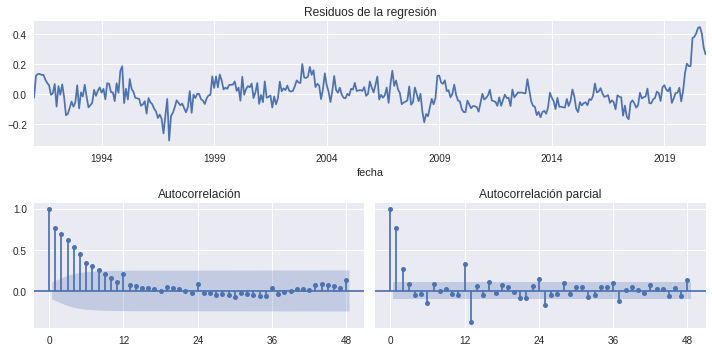

In [3]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(title='Residuos de la regresión', ax=ax)

OPCIONES = dict(lags=48, alpha=0.05, )
sm.graphics.tsa.plot_acf(res.resid, ax=axs0, title='Autocorrelación',**OPCIONES);
sm.graphics.tsa.plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial', **OPCIONES);
axs0.set_xticks([0,12,24,36,48])
axs1.set_xticks([0,12,24,36,48]);

Conocer el valor de un residuo puede ayudar a pronosticar el siguiente.

Aún así, notemos que para pronosticar el valor del M1 en 2020m12, necesitaríamos pronosticar los valores de las demás variables.
{{ termina_ejemplo }}